## Biot-Savart law

Given a wire carrying a constant electric current $I$, the produced magnetic field $B$ is given by:

$$
    \vec{B}(\vec{r}) = k I \int_{t_{ini}}^{t_{fin}} \frac{ \frac{d \vec{r'}(t)}{dt} \times (\vec{r} - \vec{r}'(t)) }{|\vec{r} - \vec{r}'(t)|^3}  \, dt
$$

Where $k$ is a physical constant and $\vec{r'}(t)$ is the parametric curve that describes the shape's wire.

Let's compute some magnetic fields.

In [1]:
# Libraries
import sympy as smp
from sympy.vector import *

import numpy as np
from scipy.integrate import quad_vec

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
t = smp.symbols('t', real = True, nonnegative = True) # Global t

def biot_savart(xrange: tuple, yrange: tuple, zrange: tuple, k0_ = 1.0, I_ = 1.0):
    global t, rprime, trange

    # Coordinate system
    O = CoordSys3D(
        name = '',
        transformation = 'cartesian',
        vector_names = ['i', 'j', 'k'],
        variable_names = ['x', 'y', 'z'],
        )

    i = O.i
    j = O.j
    k = O.k

    x = O.x
    y = O.y
    z = O.z

    # Symbols
    k0, I = smp.symbols('k I', real = True, constant = True, positive = True)

    # Position vector
    r = x * i + y * j + z * k

    # Position of a point on the wire and derivative
    xp, yp, zp = rprime
    rp = xp * i + yp * j + zp * k
    d_rp_dt = smp.diff(rp, t, 1)

    # Integrand function
    dBdt = k0 * I * (d_rp_dt.cross(r - rp)) / ((smp.sqrt((r - rp).dot(r - rp))) ** 3)

    # Going numerically
    dBdt = dBdt.to_matrix(O)
    dBdt = smp.lambdify([t, x, y, z, k0, I], dBdt, 'numpy')

    # Defining the grid
    x_min, x_max = xrange
    y_min, y_max = yrange
    z_min, z_max = zrange

    x = np.linspace(x_min, x_max, 10)
    y = np.linspace(y_min, y_max, 10)
    z = np.linspace(z_min, z_max, 10)

    x, y, z = np.meshgrid(x, y, z)

    x = x.flatten()
    y = y.flatten()
    z = z.flatten()

    # Compute B, then reshape
    tmin, tmax = trange
    tmin = float(tmin)
    tmax = float(tmax)

    B = quad_vec(dBdt, tmin, tmax, args = (x, y, z, k0_, I_))[0].squeeze()

    ######################################################################

    # Plotting section
    magnitude = np.sqrt(B[0] ** 2 + B[1] ** 2 + B[2] ** 2)
    magnitude = magnitude / magnitude.max() # Normalization

    fig = plt.figure(figsize = (12, 12))
    ax = fig.add_subplot(111, projection = '3d')

    ax.quiver(x, y, z, B[0], B[1], B[2],
              length = 0.2,
              normalize = True,
              colors = plt.cm.winter(magnitude),
              alpha = 0.7)
    
    t_vals = np.linspace(tmin, tmax, 250)
    xp_ = np.vectorize(smp.lambdify(t, xp))(t_vals)
    yp_ = np.vectorize(smp.lambdify(t, yp))(t_vals)
    zp_ = np.vectorize(smp.lambdify(t, zp))(t_vals)

    ax.plot(xp_, yp_, zp_, 'r-', linewidth = 2, label = 'Wire')

    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap = plt.cm.winter,
                                              norm = plt.Normalize(0, 1)),
                                              ax = ax,
                                              shrink = 0.5)

    cbar.set_label('Magnetic Field Magnitude')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Magnetic Field')
    ax.legend()

    return plt.show()

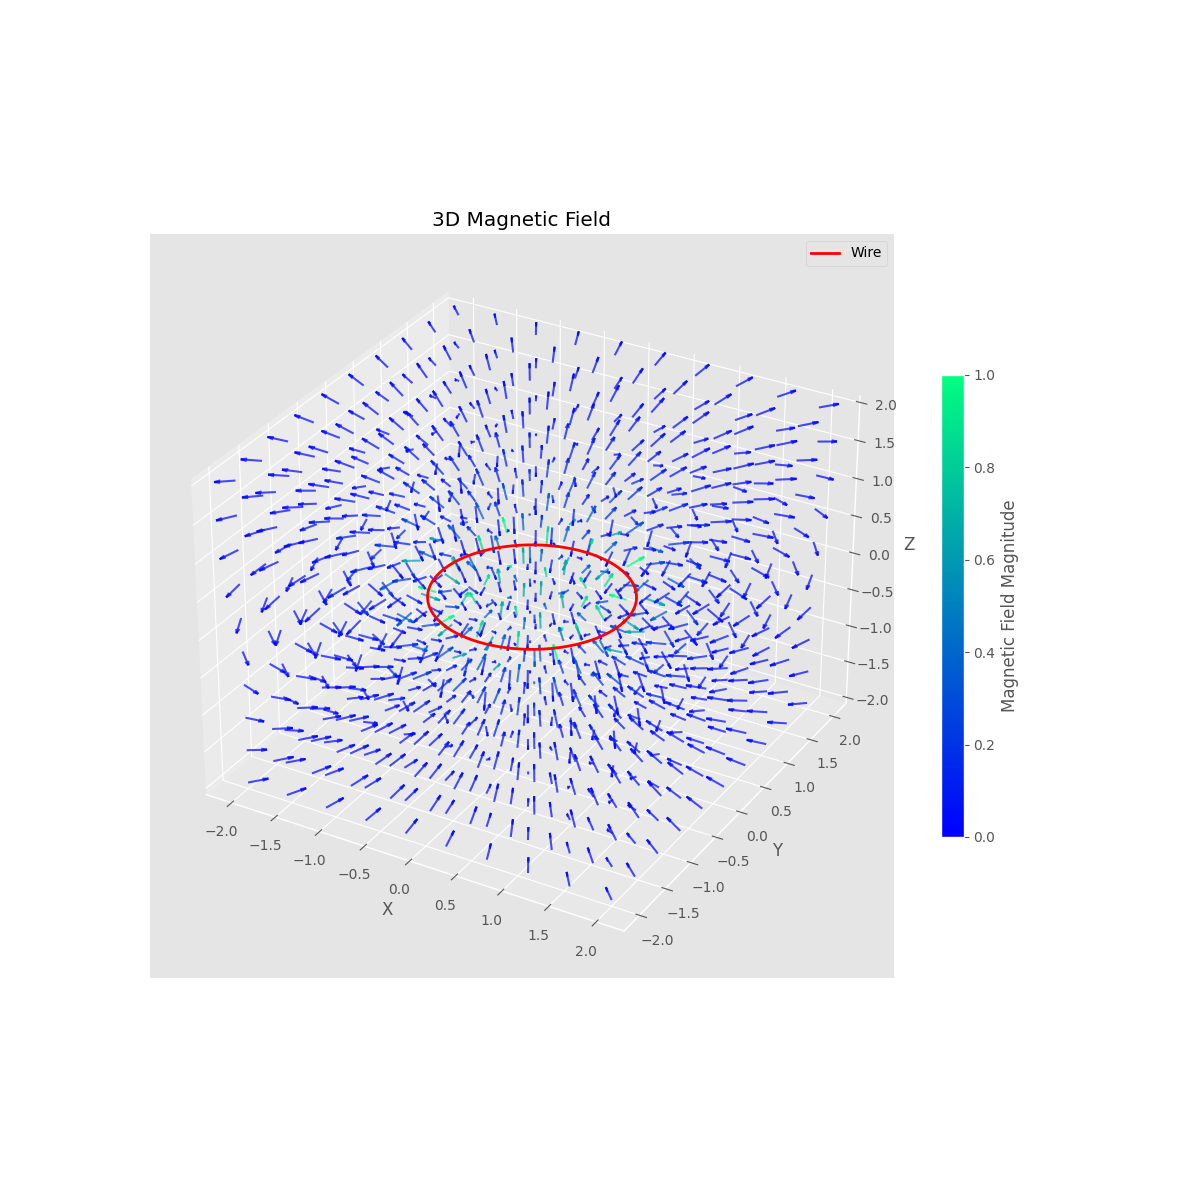

In [ ]:
# Ring
%matplotlib widget

rprime = (smp.cos(t), smp.sin(t), 0)
trange = (0, 2 * smp.pi)

biot_savart((- 2, 2), (- 2, 2), (- 2 , 2))

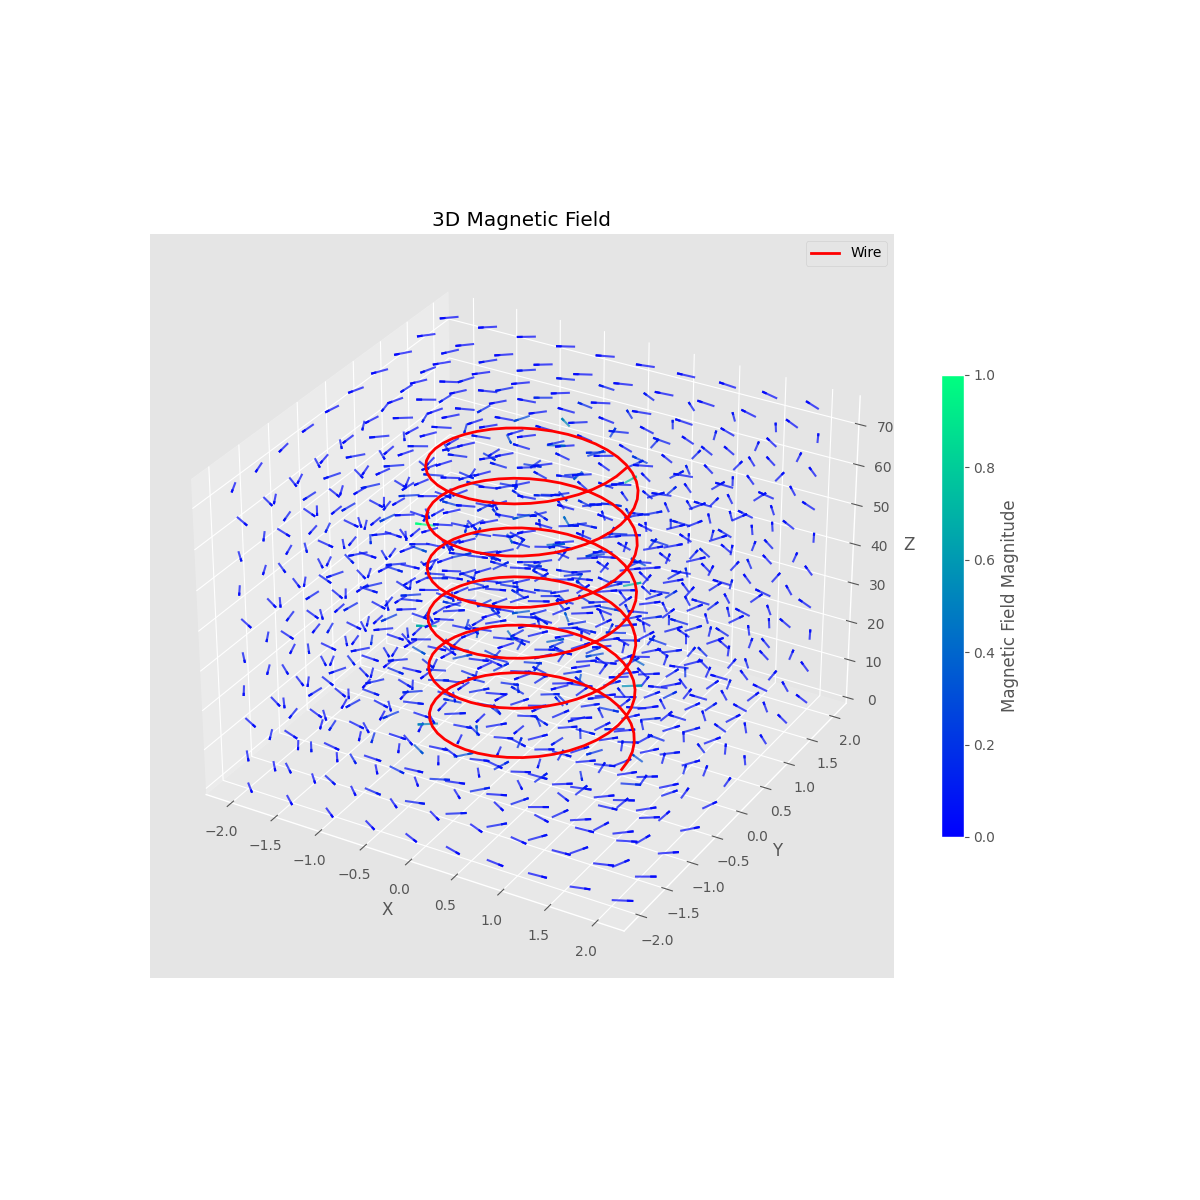

In [ ]:
# Solenoid
%matplotlib widget

rprime = (smp.cos(t), smp.sin(t), 2 * t)
trange = (0, 12 * smp.pi)

biot_savart((- 2, 2), (- 2, 2), (0, int(24 * smp.pi)))

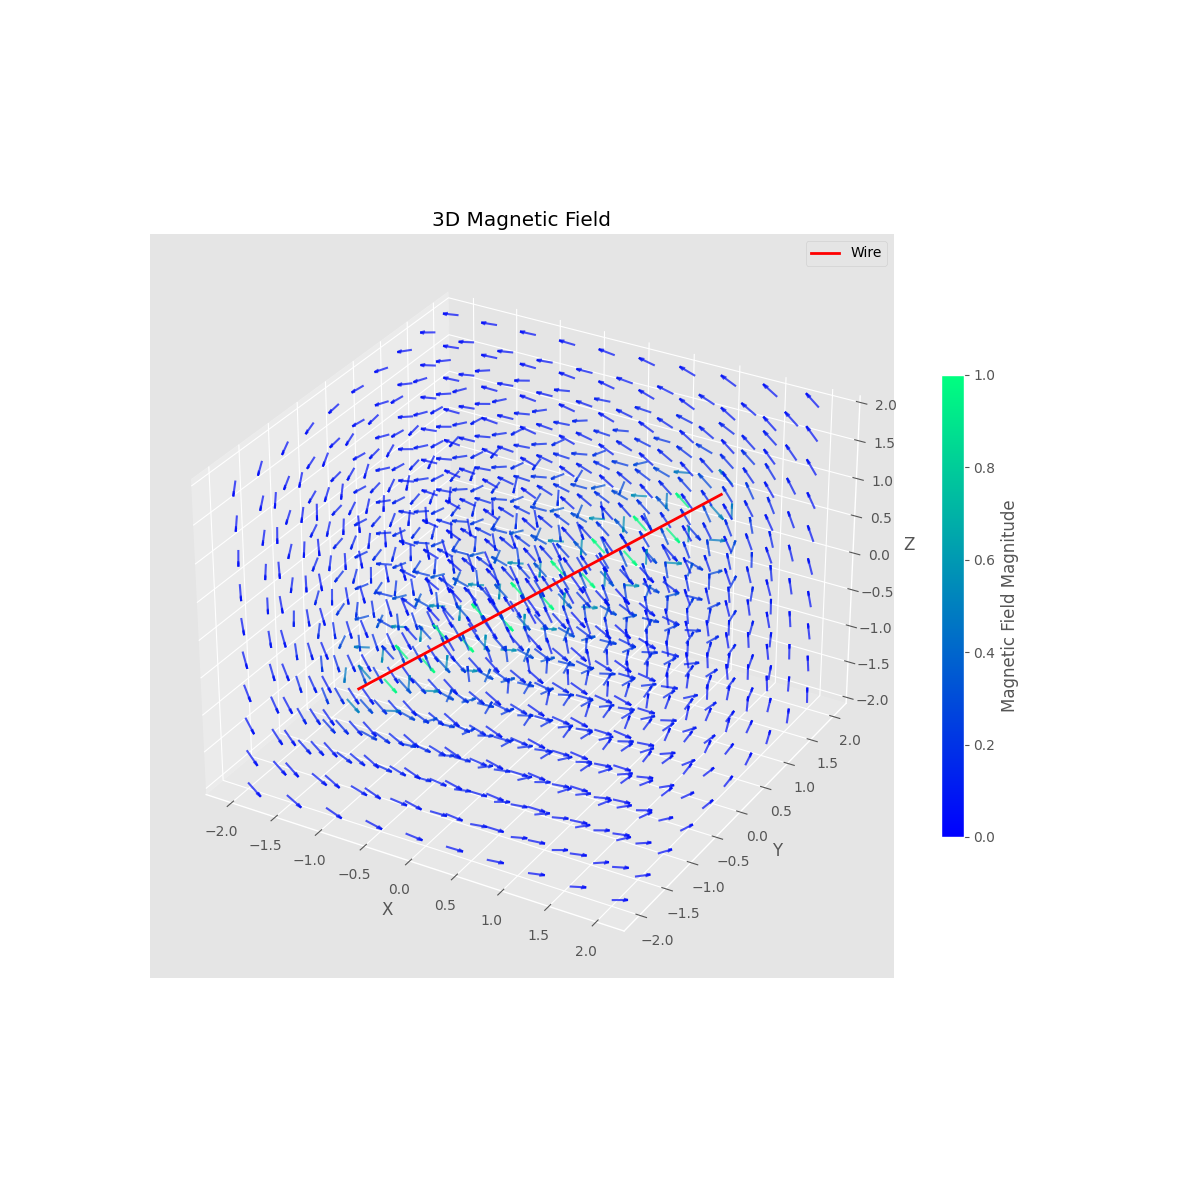

In [ ]:
# Straight wire
%matplotlib widget

rprime = (t, 0, t)
trange = (- 2 , 2)

biot_savart((- 2, 2), (- 2, 2), (- 2 , 2))

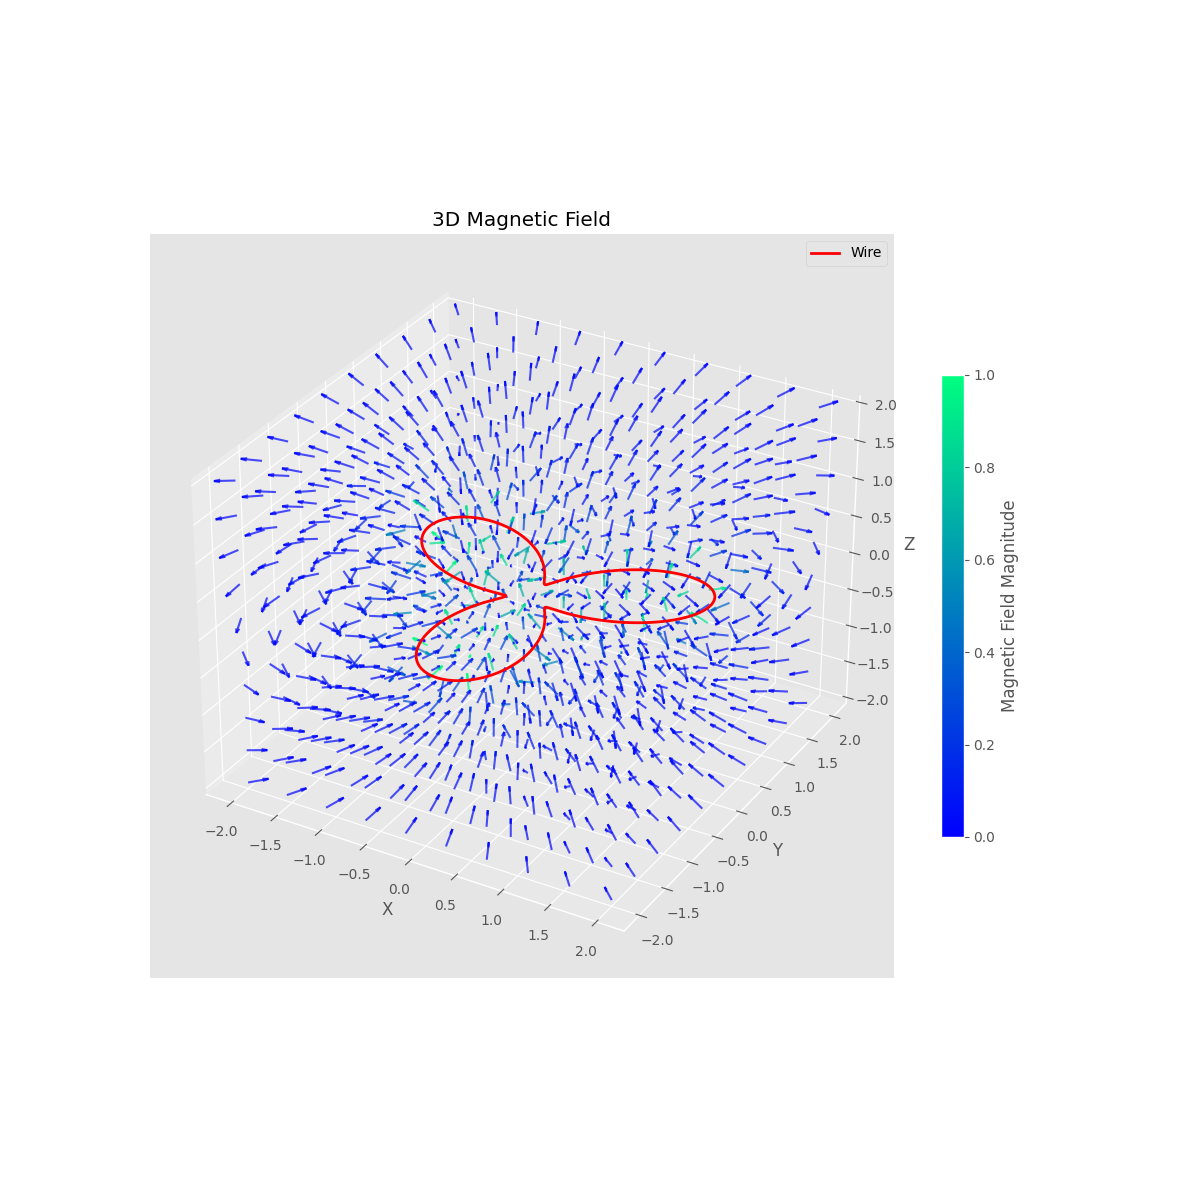

In [ ]:
# Complex wire
%matplotlib widget

rprime = ((1 + smp.Rational(3, 4) * smp.sin(3 * t)) * smp.cos(t), (1 + smp.Rational(3, 4) * smp.sin(3 * t)) * smp.sin(t), 0)
trange = (0 , 2 * smp.pi)

biot_savart((- 2, 2), (- 2, 2), (- 2 , 2))